In [2]:
# CELL BASED ANALYSIS - example cell responses

# import list
%reload_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import main_funcs as mfun
import utils_funcs as utils
import plot_funcs as pfun
import matplotlib.pyplot as plt
import pickle
from scipy import stats
from itertools import compress
import seaborn as sns
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 


#paths
savefigpath  = r'G:\My Drive\Manuscripts\1 CLAStPFC\panels_raw'
analysispath = 'C:\\Users\\Huriye\\Documents\\code\\clapfcstimulation\\analysis\\'


Env: clapfcstimulation


In [33]:
# Define cell information
cell_info = [
    {
        's_recDate': '2022-04-18', #CELL1
        's_animalID': 22103,
        's_recID': 3,
        's_cellID': 46,
        'cell_title': 'Stimulation enhanced\nvisual response',
        'y_min': -1,
        'y_max': 2.7,
    },
    {
        's_recDate': '2021-05-07', #cell4
        's_animalID': 21105,
        's_recID': 2,
        's_cellID': 88,
        'cell_title': 'Stimulation reduced\nvisual response',
        'y_min': -1,
        'y_max': 2.7,
    },
    {
        's_recDate': '2023-08-17', #cell3 - opto responsive 
        's_animalID': 2304,
        's_recID': 3,
        's_cellID': 258,
        'cell_title': 'Stimulation induced not-visual response',
        'y_min': -1,
        'y_max': 2.7,
    },
    {
        's_recDate': '2022-04-07',#CELL5
        's_animalID': 22101,
        's_recID': 4,
        's_cellID': 82,
        'cell_title': 'Opto boosted visual response',
        'y_min': -1,
        'y_max': 2.7,
    },
]
#     {
#         's_recDate': '2022-04-12', #CELL3
#         's_animalID': 22103,
#         's_recID': 6,
#         's_cellID': 184,
#         'cell_title': 'Opto boosted \nEnhanced visual response - Inhibited response',
#         'y_min': -3,
#         'y_max': 5,
#     },
#     {
#         's_recDate': '2021-05-07', #cell6
#         's_animalID': 21105,
#         's_recID': 3,
#         's_cellID': 208,
#         'cell_title': 'Opto boosted cells\nReduced visual response',
#         'y_min': -3,
#         'y_max': 1.1,
#     },
# ]

        # 's_recDate': '2022-04-12', #cell2
        # 's_animalID': 22107,
        # 's_recID': 2,
        # 's_cellID': 296,
        # 'cell_title': 'Stimulation reduced\ninhibited visual response',
        # 'y_min': -35,
        # 'y_max': 10,

None - Total animal number for 13
All cell number:872
Any responsive cell number:543
Responsice to  visual and opto but not both cell number:32
Visual cue - all visual responsive cells: 195
Visual cue - only visual responsive: 53
Visual only cue - EXC opto responsive: 0.4717948717948718
Visual only cue - INH opto responsive: 0.5282051282051282
Opto stimulation - all opto responsive cells: 327
Opto stimulation - only opto responsive: 117
Opto stimulation - EXC opto responsive: 0.25688073394495414
Opto stimulation - INH opto responsive: 0.7431192660550459
Both - all both responsive cells:341
Both - only both responsive: 123
Both - EXC opto responsive: 0.3983739837398374
Both - INH opto responsive: 0.6016260162601627
All cell number:2518
Any responsive cell number:1668
Responsice to  visual and opto but not both cell number:191
Visual cue - all visual responsive cells: 712
Visual cue - only visual responsive: 212
Visual only cue - EXC opto responsive: 0.3553370786516854
Visual only cue - 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


All cell number:7319
Any responsive cell number:4246
Responsice to  visual and opto but not both cell number:363
Visual cue - all visual responsive cells: 1903
Visual cue - only visual responsive: 673
Visual only cue - EXC opto responsive: 0.5144508670520231
Visual only cue - INH opto responsive: 0.48554913294797686
Opto stimulation - all opto responsive cells: 2236
Opto stimulation - only opto responsive: 886
Opto stimulation - EXC opto responsive: 0.3814847942754919
Opto stimulation - INH opto responsive: 0.618515205724508
Both - all both responsive cells:2324
Both - only both responsive: 901
Both - EXC opto responsive: 0.5105438401775805
Both - INH opto responsive: 0.4894561598224195
Sensory - Total animal number for 13
All cell number:872
Any responsive cell number:543
Responsice to  visual and opto but not both cell number:32
Visual cue - all visual responsive cells: 195
Visual cue - only visual responsive: 53
Visual only cue - EXC opto responsive: 0.4717948717948718
Visual only c

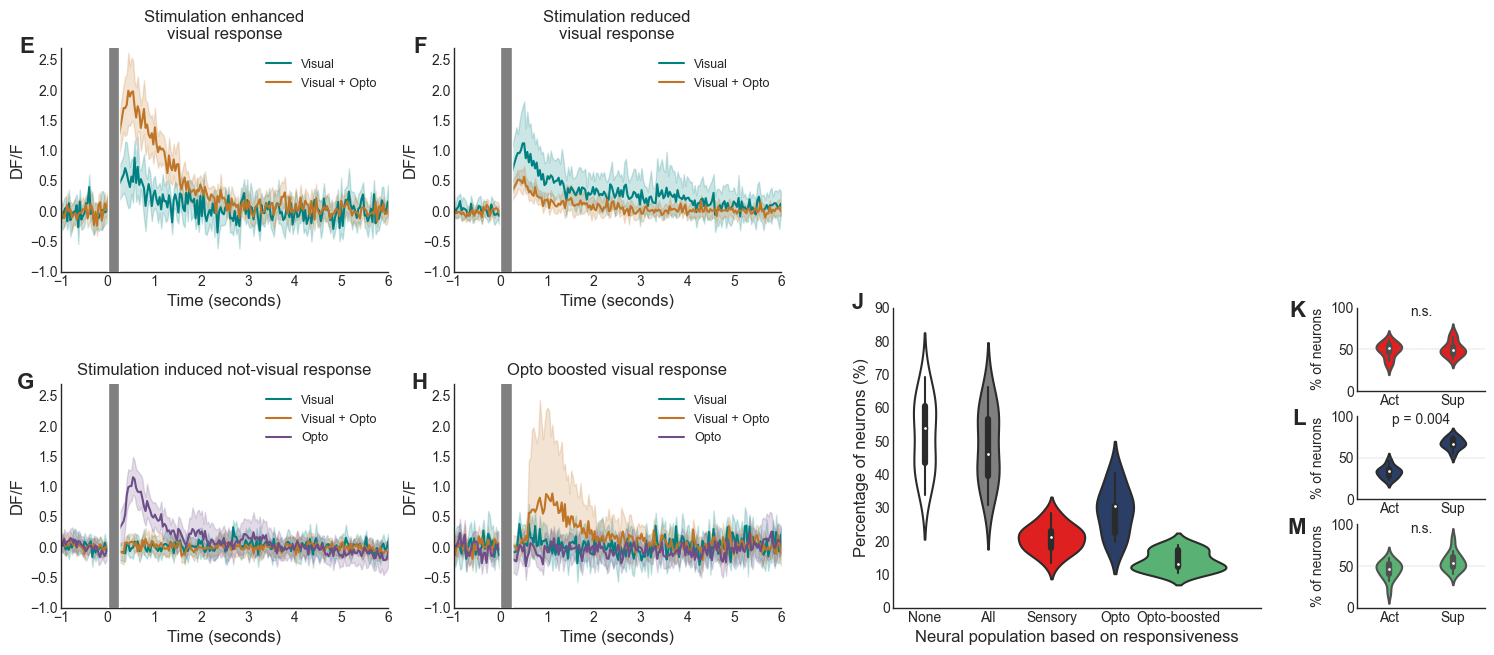

In [34]:
# Figure 1 panels

pfun.set_figure()
fig = plt.figure(constrained_layout=False, figsize=(16, 20)) # 8,11 for full A4 page

# There will be top row from Illustrator for the schematic of the task & histology

gs_sampleCellTraces  = fig.add_gridspec(ncols=2, nrows=2, bottom=0.05, top=0.33, left=0.05, right=0.50,
                              wspace=0.2, hspace=0.5)

gs_cellRatios = fig.add_gridspec(ncols=1, nrows=1, bottom=0.05, top=0.20, left=0.57, right=0.80, 
                              wspace=0.2, hspace=0)

gs_E_I_Ratios   = fig.add_gridspec(ncols=1, nrows=3, bottom=0.05, top=0.20, left=0.86, right=0.94,
                              wspace=0.2, hspace=0.3)

# Panel E-F: Barplot for cell traces
ax_gs_sampleCellTraces = {xx: fig.add_subplot(gs_sampleCellTraces[xx]) for xx in range(4)}
tTypes = ['Visual', 'Visual + Opto' ]
for i, cell_info_dict in enumerate(cell_info):
    ax = ax_gs_sampleCellTraces[i]
    if i>1:
        tTypes = ['Visual','Visual + Opto','Opto']
    pfun.plot_cell_trace(ax, analysispath, tTypes, **cell_info_dict)

# Panel D: Barplot for cell ratios
ax_gs_cellRatios = {xx: fig.add_subplot(gs_cellRatios[xx]) for xx in range(1)}
pfun.plot_cellRatiosPerAnimal('All', ['Chrimson'], ['Naive'], ax=ax_gs_cellRatios[0], 
                              savefigname=None, savefigpath=None)

# Panel D: Barplot for cell ratios
ax_gs_E_I_Ratios = {xx: fig.add_subplot(gs_E_I_Ratios[xx]) for xx in range(3)}
pfun.plot_cellRatiosPerAnimal('Sensory', ['Chrimson'], ['Naive'], ax=ax_gs_E_I_Ratios[0],
                              savefigname=None, savefigpath=None)
pfun.plot_cellRatiosPerAnimal('Opto', ['Chrimson'], ['Naive'], ax=ax_gs_E_I_Ratios[1],
                              savefigname=None, savefigpath=None)
pfun.plot_cellRatiosPerAnimal('Opto-boosted', ['Chrimson'], ['Naive'], ax=ax_gs_E_I_Ratios[2],
                              savefigname=None, savefigpath=None)

# Lets add the labels
axes = [ ax_gs_sampleCellTraces,ax_gs_cellRatios, ax_gs_E_I_Ratios ]
labels = ['E','F','G','H','J','K',
          'L','M','N']
lInd = 0
for ax, label in zip(axes, labels):
    for key in ax:
        if lInd <5:
            ax[key].text(-0.08, 1.05, labels[lInd], transform=ax[key].transAxes, fontsize=16, 
                    fontweight='bold', va='top', ha='right',
                    bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        else:
            ax[key].text(-0.4, 1.08, labels[lInd], transform=ax[key].transAxes, fontsize=16, 
                    fontweight='bold', va='top', ha='right',
                    bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        lInd += 1

savefigname = 'Figure1_CellSampleTraces'
pfun.save_figure(savefigname,savefigpath)
#plt.close()



In [21]:
# To see the numbers & ratios for each subpopulation of responsive cells
mfun.selectInterestedcells ( 'Chrimson', 'Naive', responsive = 'Opto', plotValues = True, pupil = False )

Env: clapfcstimulation
Env: clapfcstimulation
All cell number:49212
Any responsive cell number:24575
Responsice to  visual and opto but not both cell number:1802
Visual cue - all visual responsive cells: 10531
Visual cue - only visual responsive: 4407
Visual only cue - EXC opto responsive: 0.4991928591776659
Visual only cue - INH opto responsive: 0.500807140822334
Opto stimulation - all opto responsive cells: 11365
Opto stimulation - only opto responsive: 5098
Opto stimulation - EXC opto responsive: 0.3332160140783106
Opto stimulation - INH opto responsive: 0.6667839859216894
Both - all both responsive cells:13268
Both - only both responsive: 6256
Both - EXC opto responsive: 0.4534846547314578
Both - INH opto responsive: 0.5465153452685422


({'All': 49212,
  'Any responsive': 49.937007234007964,
  'all': 23.093960822563602,
  'only': 11365,
  'EXC': 33.32160140783106,
  'INH': 66.67839859216895},
 array([False, False, False, ..., False, False, False]))

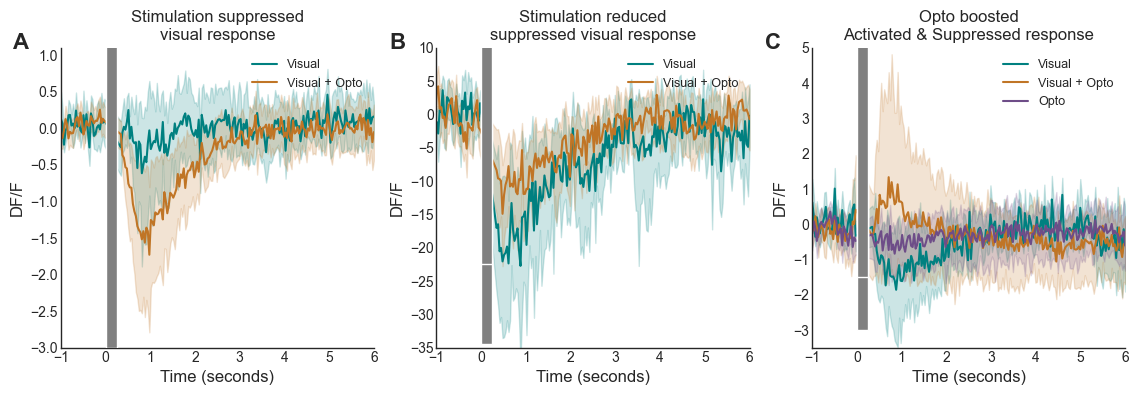

In [3]:
# Supplementary Inhibitory Responses 1 panels
# Define cell information
cell_info = [
    {
        's_recDate': '2021-05-07', #cell6
        's_animalID': 21105,
        's_recID': 3,
        's_cellID': 208,
        'cell_title': 'Stimulation suppressed\nvisual response',
        'y_min': -3,
        'y_max': 1.1,
    },
    {

        's_recDate': '2022-04-12', #cell2
        's_animalID': 22107,
        's_recID': 2,
        's_cellID': 296,
        'cell_title': 'Stimulation reduced\nsuppressed visual response',
        'y_min': -35,
        'y_max': 10,
    },
    {
        's_recDate': '2022-04-12', #CELL3
        's_animalID': 22103,
        's_recID': 6,
        's_cellID': 184,
        'cell_title': 'Opto boosted\nActivated & Suppressed response',
        'y_min': -3.5,
        'y_max': 5,
    },
]

pfun.set_figure()
fig = plt.figure(constrained_layout=False, figsize=(16, 20)) # 8,11 for full A4 page

# There will be top row from Illustrator for the schematic of the task & histology

gs_sampleCellTraces  = fig.add_gridspec(ncols=4, nrows=1, bottom=0.05, top=0.20, left=0.05, right=0.95,
                              wspace=0.2, hspace=0.8)


# Panel E-F: Barplot for cell traces
ax_gs_sampleCellTraces = {xx: fig.add_subplot(gs_sampleCellTraces[xx]) for xx in range(3)}
tTypes = ['Visual', 'Visual + Opto' ]
for i, cell_info_dict in enumerate(cell_info):
    ax = ax_gs_sampleCellTraces[i]
    if i>1:
        tTypes = ['Visual','Visual + Opto','Opto']
    pfun.plot_cell_trace(ax, analysispath, tTypes, **cell_info_dict)


# Lets add the labels
axes = [ ax_gs_sampleCellTraces ]
labels = ['A','B','C','D']
lInd = 0
for ax, label in zip(axes, labels):
    for key in ax:
        if lInd <5:
            ax[key].text(-0.1, 1.05, labels[lInd], transform=ax[key].transAxes, fontsize=16, 
                    fontweight='bold', va='top', ha='right',
                    bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        lInd += 1

savefigname = 'Figure1SUPP_ExtraCellSampleTraces'
pfun.save_figure(savefigname,savefigpath)
#plt.close()